# Name:-Kiran Avhad

# Email Id:-Kiranavhad886@gmail.com

# Linkedin Profile:-https://www.linkedin.com/in/kiran-avhad-296499155

# Contour Features

In [1]:
from PIL import Image
from IPython.display import Image


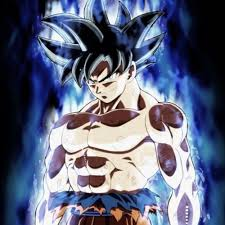

In [2]:
path="D:/FILM/download.jpg"
Image(filename=r"D:/FILM/download.jpg")

# 1 Moments :-


# Image moments help you to calculate some features like center of mass of the object, area of the object 

The function cv2.moments() gives a dictionary of all moment values calculated. See below:

In [3]:
import cv2
import numpy as np

In [4]:
import cv2
import numpy as np

img = cv2.imread("D:/FILM/download.jpg",0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print("M=",M)

M= {'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [5]:
contours,hierarchy

([array([[[127, 223]],
  
         [[127, 224]]], dtype=int32),
  array([[[183, 222]],
  
         [[184, 221]],
  
         [[185, 222]],
  
         [[184, 223]]], dtype=int32),
  array([[[168, 222]],
  
         [[169, 221]],
  
         [[170, 222]],
  
         [[170, 223]],
  
         [[169, 224]],
  
         [[168, 223]]], dtype=int32),
  array([[[ 58, 222]],
  
         [[ 59, 221]],
  
         [[ 60, 222]],
  
         [[ 59, 223]]], dtype=int32),
  array([[[184, 221]],
  
         [[185, 220]],
  
         [[187, 220]],
  
         [[188, 221]],
  
         [[187, 222]],
  
         [[185, 222]]], dtype=int32),
  array([[[182, 221]],
  
         [[183, 220]],
  
         [[184, 221]],
  
         [[183, 222]]], dtype=int32),
  array([[[149, 221]],
  
         [[150, 220]],
  
         [[151, 221]],
  
         [[151, 222]],
  
         [[150, 223]],
  
         [[149, 222]]], dtype=int32),
  array([[[ 80, 220]],
  
         [[ 79, 221]],
  
         [[ 79, 223]],
  
      

# 2. Contour Area
Contour area is given by the function cv2.contourArea() or from moments

In [6]:
area = cv2.contourArea(cnt)
area

0.0

# 3. Contour Perimeter
It is also called arc length. It can be found out using cv2.arcLength() function. Second argument specify whether shape is a closed contour (if passed True), or just a curve.

In [7]:
perimeter = cv2.arcLength(cnt,True)
perimeter

2.0

# 4. Contour Approximation
It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of Douglas-Peucker algorithm. Check the wikipedia page for algorithm and demonstration.

To understand this, suppose you are trying to find a square in an image, but due to some problems in the image, you didn’t get a perfect square, but a “bad shape” (As shown in first image below). Now you can use this function to approximate the shape. In this, second argument is called epsilon, which is maximum distance from contour to approximated contour. It is an accuracy parameter. A wise selection of epsilon is needed to get the correct output.

In [8]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
epsilon
approx

array([[[127, 223]],

       [[127, 224]]], dtype=int32)

# 5. Convex Hull
Convex Hull will look similar to contour approximation, but it is not (Both may provide same results in some cases). Here, cv2.convexHull() function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects. For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours.

In [9]:
hull = cv2.convexHull(cnt)
hull

array([[[127, 224]],

       [[127, 223]]], dtype=int32)

# 6. Checking Convexity
There is a function to check if a curve is convex or not, cv2.isContourConvex(). It just return whether True or False. Not a big deal.

In [10]:
k = cv2.isContourConvex(cnt)
k

False

# 7. Bounding Rectangle
There are two types of bounding rectangles

# 7.a. Straight Bounding Rectangle
It is a straight rectangle, it doesn’t consider the rotation of the object. So area of the bounding rectangle won’t be minimum. It is found by the function cv2.boundingRect().

Let (x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.

In [11]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
x,y,w,h 
img

array([[ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       ...,
       [ 5,  6,  8, ..., 47, 41, 34],
       [ 5,  6,  8, ..., 47, 41, 35],
       [ 4,  6, 10, ..., 46, 44, 35]], dtype=uint8)

# 7.b. Rotated Rectangle
Here, bounding rectangle is drawn with minimum area, so it considers the rotation also. The function used is cv2.minAreaRect(). It returns a Box2D structure which contains following detals - ( top-left corner(x,y), (width, height), angle of rotation ). But to draw this rectangle, we need 4 corners of the rectangle. It is obtained by the function cv2.boxPoints()

In [12]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img = cv2.drawContours(img,[box],0,(0,0,255),2)
rect


((127.0, 223.5), (1.0, 0.0), 90.0)

In [13]:
box

array([[127, 223],
       [127, 223],
       [127, 224],
       [127, 224]], dtype=int64)

In [14]:

img

array([[ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       ...,
       [ 5,  6,  8, ..., 47, 41, 34],
       [ 5,  6,  8, ..., 47, 41, 35],
       [ 4,  6, 10, ..., 46, 44, 35]], dtype=uint8)

# 8. Minimum Enclosing Circle
Next we find the circumcircle of an object using the function cv2.minEnclosingCircle(). It is a circle which completely covers the object with minimum area.

In [15]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)
center


(127, 223)

In [16]:
radius

0

In [17]:
img

array([[ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       ...,
       [ 5,  6,  8, ..., 47, 41, 34],
       [ 5,  6,  8, ..., 47, 41, 35],
       [ 4,  6, 10, ..., 46, 44, 35]], dtype=uint8)

In [18]:
img.shape

(225, 225)

# 9. Fitting a Line
Similarly we can fit a line to a set of points. Below image contains a set of white points. We can approximate a straight line to it.

In [20]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)


In [21]:
img = cv2.line(img,(cols-1,100),(0,100),(0,255,0),2)
img

array([[ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       ...,
       [ 5,  6,  8, ..., 47, 41, 34],
       [ 5,  6,  8, ..., 47, 41, 35],
       [ 4,  6, 10, ..., 46, 44, 35]], dtype=uint8)

In [22]:
lefty

2905421568

In [23]:
righty

-2241978368

In [24]:
img = cv2.line(img,(cols-1,100),(0,100),(0,255,0),2)
img

array([[ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       ...,
       [ 5,  6,  8, ..., 47, 41, 34],
       [ 5,  6,  8, ..., 47, 41, 35],
       [ 4,  6, 10, ..., 46, 44, 35]], dtype=uint8)

In [25]:
img

array([[ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       ...,
       [ 5,  6,  8, ..., 47, 41, 34],
       [ 5,  6,  8, ..., 47, 41, 35],
       [ 4,  6, 10, ..., 46, 44, 35]], dtype=uint8)